# Tarea - Caminata aleatoria y simulación montecarlo

#### 1. Simulación del movimiento browniano

El movimiento browniano es el movimiento aleatorio que se observa en las partículas que se hallan en un medio fluido, como resultado de choques contra las moléculas de dicho fluido [(referencia)].

[(referencia)]: https://es.wikipedia.org/wiki/Movimiento_browniano

Para simular el movimiento, en lugar de usar las ecuaciones integro-diferenciales que describe Einstein, use una caminta aleatoria para los tres ejes $x$, $y$, $z$ de la siguiente forma
$$
W_i=W_{i-1}+X_i\sqrt{\Delta t}
$$
donde, $\Delta t$ es un intervalo de tiempo y 
$$
X_i=\left\{\begin{array}{l}
1\\
-1
\end{array}\right.,
$$
se escoge de forma aleatoria con la misma probabilidad.

Simule $10$ segundos con un $\Delta t=0.001$ y represéntelo en un gráfico 3D (Puede ver el archivo de Ejemplo 3D).

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parámetros de la simulación
dt = 0.001  # Intervalo de tiempo
t = 10  # Duración de la simulación en segundos
N = int(t/dt)  # Número de pasos

# Posición inicial en el origen
list_pos = np.zeros(3)

# Lista para almacenar las posiciones en cada paso
list_pos = [pos]

# Simulación
for i in range(N):
    # Generar números aleatorios para cada eje
    r = np.random.choice([-1, 1], size=3, p=[0.5, 0.5])
    # Actualizar la posición
    pos = pos + r*np.sqrt(dt)
    # Añadir la nueva posición a la lista
    pos_list.append(pos)

# Convertir la lista a un arreglo numpy
pos_array = np.array(pos_list)

# Graficar el resultado en un gráfico 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(pos_array[:, 0], pos_array[:, 1], pos_array[:, 2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'append'

array([0., 0., 0.])

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

dt = 0.001
t = 10
n = int(t/dt)

lista = []

for i in range(n):
    a = np.random.choice([-1,1], size=3)
    pos = pos + a*np.sqrt(dt)
    lista.append(pos)

listanp = np.array(lista)


<function matplotlib.pyplot.show(close=None, block=None)>

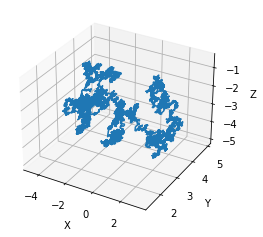

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(listanp[:, 0], listanp[:, 1], listanp[:, 2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show

#### 2. Apuesta arriesgada

Un jugador, con 20 pesos de capital inicial, decide apostar a un volado (con una moneda perfectamente nivelada) la mitad de su capital si éste es mayor o igual a 6 pesos, de lo contrario, solo 2. Esto es, el capital $C_i$ en cada volado $V_i$ se describe como
$$
C_{i+1}=C_i+V_iA_i
$$
donde la apuesta es 
$$
A_i=\left\{\begin{array}{l}
C_i/2,\quad \mbox{si }C_i\geq 6\\
2,\quad \mbox{de lo contrario.}
\end{array}\right.
$$

1. Grafique la evolución del capital hasta quedar en cero.
2. Determine el número de volados promedio para quedar en quiebra usando la simulación montecarlo para 10,000 apostadores.
3. Muestre un histograma del número de volados.

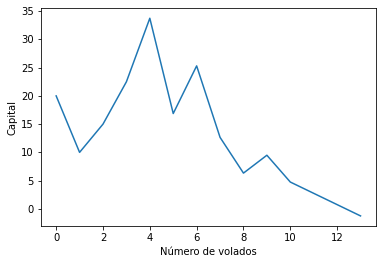

In [46]:
def apuesta(capital):
    if capital >= 6:
        return capital/2
    else:
        return 2

def jugar():
    capital = 20
    historia = [capital]
    while capital > 0:
        apuesta_actual = apuesta(capital)
        resultado = np.random.choice([-1, 1])
        capital += apuesta_actual * resultado
        historia.append(capital)
    return historia

historia = jugar()

plt.plot(historia)
plt.xlabel('Número de volados')
plt.ylabel('Capital')
plt.show()

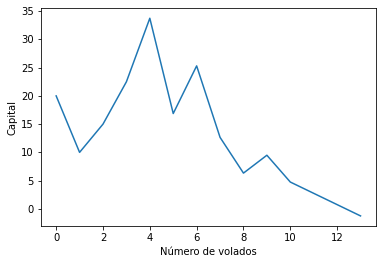

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Define la función de apuesta
def apuesta(capital):
    if capital >= 6:
        return capital/2
    else:
        return 2

# Define la simulación de un jugador
def jugar():
    capital = 20
    num_volados = 0
    while capital > 0:
        apuesta_actual = apuesta(capital)
        resultado = np.random.choice([-1, 1])
        capital += apuesta_actual * resultado
        num_volados += 1
    return num_volados

jugar()

plt.plot(historia)
plt.xlabel('Número de volados')
plt.ylabel('Capital')
plt.show()


In [52]:

# Simular el proceso para 10,000 jugadores
num_jugadores = 10000
resultados = []
for i in range(num_jugadores):
    num_volados = jugar()
    resultados.append(num_volados)
promedio_volados = np.mean(resultados)
print('Número promedio de volados hasta la quiebra:', promedio_volados)

Número promedio de volados hasta la quiebra: 26.2153


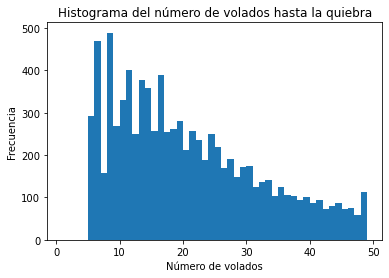

In [51]:
# Graficar el histograma
plt.hist(resultados, bins=range(1, 50))
plt.xlabel('Número de volados')
plt.ylabel('Frecuencia')
plt.title('Histograma del número de volados hasta la quiebra')
plt.show()